# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [124]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [125]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [126]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
#      city_url= f"{url}appid={api_key}&q="
    city_url = url + "&q=" + city.replace(" ","+") + "&appid=" + weather_api_key
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

  # Run an API request for each of the cities 
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp =city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san jose de guanipa
Processing Record 2 of Set 1 | samana
Processing Record 3 of Set 1 | bilma
Processing Record 4 of Set 1 | papar
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | cherskiy
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | leningradskiy
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | kununurra
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | sur
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | butaritari
Proces

City not found. Skipping...
Processing Record 36 of Set 4 | pisco
Processing Record 37 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 38 of Set 4 | lorengau
Processing Record 39 of Set 4 | lebu
Processing Record 40 of Set 4 | vila franca do campo
Processing Record 41 of Set 4 | patea
Processing Record 42 of Set 4 | san patricio
Processing Record 43 of Set 4 | kruisfontein
Processing Record 44 of Set 4 | sola
Processing Record 45 of Set 4 | casa nova
Processing Record 46 of Set 4 | ibra
Processing Record 47 of Set 4 | arraial do cabo
Processing Record 48 of Set 4 | fortuna
Processing Record 49 of Set 4 | porto belo
Processing Record 0 of Set 5 | hornostayivka
Processing Record 1 of Set 5 | skalistyy
City not found. Skipping...
Processing Record 2 of Set 5 | kodinsk
Processing Record 3 of Set 5 | uige
Processing Record 4 of Set 5 | isangel
Processing Record 5 of Set 5 | waipawa
Processing Record 6 of Set 5 | kavaratti
Processing Record 7 of Set 5 | aldan
Processing Rec

Processing Record 25 of Set 8 | sinkat
City not found. Skipping...
Processing Record 26 of Set 8 | tornio
Processing Record 27 of Set 8 | powell river
Processing Record 28 of Set 8 | murgab
Processing Record 29 of Set 8 | sultanpur
Processing Record 30 of Set 8 | tulnici
Processing Record 31 of Set 8 | constitucion
Processing Record 32 of Set 8 | bourail
Processing Record 33 of Set 8 | nguiu
City not found. Skipping...
Processing Record 34 of Set 8 | aromashevo
Processing Record 35 of Set 8 | wanaka
Processing Record 36 of Set 8 | goderich
Processing Record 37 of Set 8 | tabriz
Processing Record 38 of Set 8 | sinjar
Processing Record 39 of Set 8 | bilibino
Processing Record 40 of Set 8 | pauini
Processing Record 41 of Set 8 | ust-ilimsk
Processing Record 42 of Set 8 | coquimbo
Processing Record 43 of Set 8 | salinas
Processing Record 44 of Set 8 | tual
Processing Record 45 of Set 8 | shaoxing
Processing Record 46 of Set 8 | dunnville
Processing Record 47 of Set 8 | alta floresta
Proces

Processing Record 14 of Set 12 | sobolevo
Processing Record 15 of Set 12 | lufilufi
Processing Record 16 of Set 12 | hofn
Processing Record 17 of Set 12 | natal
Processing Record 18 of Set 12 | jiayuguan
Processing Record 19 of Set 12 | hanzhong
Processing Record 20 of Set 12 | jaipur hat
City not found. Skipping...
Processing Record 21 of Set 12 | yalta
Processing Record 22 of Set 12 | imbituba
Processing Record 23 of Set 12 | porto santo
Processing Record 24 of Set 12 | pozo colorado
Processing Record 25 of Set 12 | debre sina
Processing Record 26 of Set 12 | rongcheng
Processing Record 27 of Set 12 | ratnagiri
Processing Record 28 of Set 12 | inirida
Processing Record 29 of Set 12 | sfantu gheorghe
Processing Record 30 of Set 12 | verkhoyansk
Processing Record 31 of Set 12 | hovd
Processing Record 32 of Set 12 | bonavista
Processing Record 33 of Set 12 | waingapu
Processing Record 34 of Set 12 | inuvik
Processing Record 35 of Set 12 | mackenzie
Processing Record 36 of Set 12 | irtys

In [127]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [128]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san jose de guanipa,8.8872,-64.1651,296.58,82,100,2.28,VE,1670216964
1,samana,19.2056,-69.3369,296.59,69,10,4.40,DO,1670216965
2,bilma,18.6853,12.9164,293.37,21,0,3.03,NE,1670216965
3,papar,5.7333,115.9333,305.15,73,100,2.73,MY,1670216966
4,rikitea,-23.1203,-134.9692,297.23,82,67,4.53,PF,1670216966


In [129]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [130]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san jose de guanipa,8.8872,-64.1651,296.58,82,100,2.28,VE,1670216964
1,samana,19.2056,-69.3369,296.59,69,10,4.40,DO,1670216965
2,bilma,18.6853,12.9164,293.37,21,0,3.03,NE,1670216965
3,papar,5.7333,115.9333,305.15,73,100,2.73,MY,1670216966
4,rikitea,-23.1203,-134.9692,297.23,82,67,4.53,PF,1670216966


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

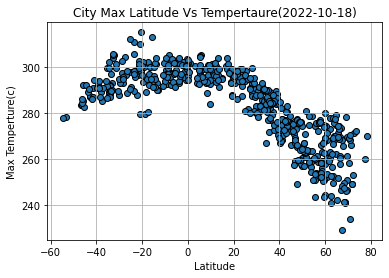

In [131]:
# Build scatter plot for latitude vs. temperature
x_values= city_data_df["Lat"]
y_values= city_data_df["Max Temp"]
plt.scatter(x_values,y_values,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperture(c)")
plt.title("City Max Latitude Vs Tempertaure(2022-10-18)")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

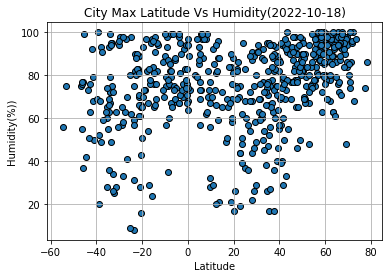

In [132]:
# Build the scatter plots for latitude vs. humidity
x_values= city_data_df["Lat"]
y_values= city_data_df["Humidity"]
plt.scatter(x_values,y_values,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%))")
plt.title("City Max Latitude Vs Humidity(2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

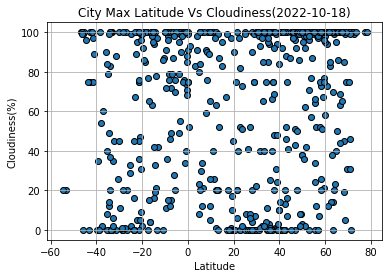

In [133]:
# Build the scatter plots for latitude vs. cloudiness
x_values= city_data_df["Lat"]
y_values= city_data_df["Cloudiness"]
plt.scatter(x_values,y_values,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Max Latitude Vs Cloudiness(2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

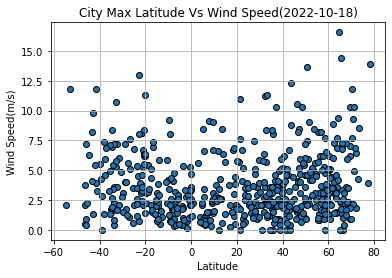

In [134]:
# Build the scatter plots for latitude vs. wind speed
x_values= city_data_df["Lat"]
y_values= city_data_df["Wind Speed"]
plt.scatter(x_values,y_values,edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.title("City Max Latitude Vs Wind Speed(2022-10-18)")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [136]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_lat= city_data_df.loc[city_data_df["Lat"]>=0,:]
northern_hemi_df = pd.DataFrame(north_lat)    

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san jose de guanipa,8.8872,-64.1651,296.58,82,100,2.28,VE,1670216964
1,samana,19.2056,-69.3369,296.59,69,10,4.40,DO,1670216965
2,bilma,18.6853,12.9164,293.37,21,0,3.03,NE,1670216965
3,papar,5.7333,115.9333,305.15,73,100,2.73,MY,1670216966
6,cherskiy,68.7500,161.3000,241.00,90,5,2.31,RU,1670216967


In [137]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_lat= city_data_df.loc[city_data_df["Lat"]<0,:]
southern_hemi_df = pd.DataFrame(south_lat)    


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,rikitea,-23.1203,-134.9692,297.23,82,67,4.53,PF,1670216966
5,east london,-33.0153,27.9116,292.85,95,100,5.28,ZA,1670216967
7,new norfolk,-42.7826,147.0587,286.99,63,100,1.34,AU,1670216968
8,bredasdorp,-34.5322,20.0403,289.06,63,12,1.60,ZA,1670216968
11,port alfred,-33.5906,26.8910,289.92,95,100,0.45,ZA,1670216969


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7295401037650947
y = -0.71x + 305.69


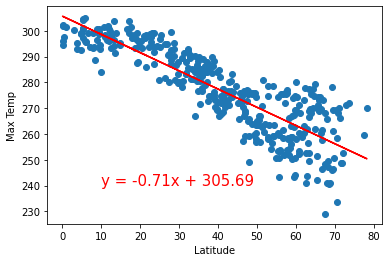

In [138]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,240),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.show()

The r-squared is: 0.2622413351652246


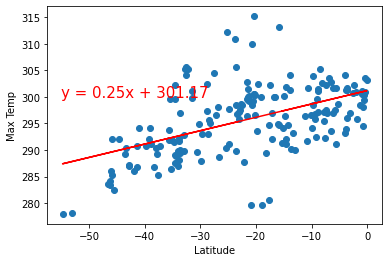

In [139]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,300),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In Northern Hemisphere r squared value is 0.72, which tells around there is very strong realtion between latitude and temperature as we can see the max temperture begins to fall as we go away from latitude.Also here the slope is 305 and coefficent is negative which means temperature would decrease with latitude very fast .On the other hand, as we go in southern hemisphere r square value is 0.26 which means 26% chances that max temp is affected by latitude and positive coeffient tells about incraese in tempertaure with incraese in latitude value .

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.11783692776233977
y = 0.34x + 63.04


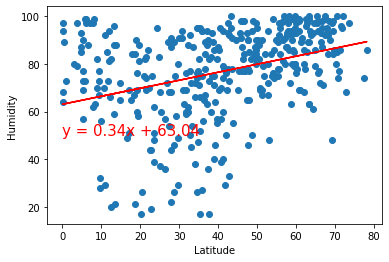

In [140]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.show()

The r-squared is: 0.06624444570518087
y = 0.38x + 79.87


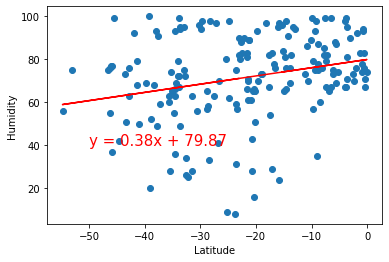

In [141]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.show()

**Discussion about the linear relationship:** If we compare latitude with Humidity in northen hempisphere, r squared is 0.11 from which we can say very small increase in humidity with increase in latitude.The equation of line shows us slope is 63.04 and coefficent is positive which means humidity increases with temperature. In southern hemisphere, it is 0.066, which is very weak , so we can say it humidity does not get affected with latitude in southern hemisphere and coefficent is 0.38 which is positive which showes increase in humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.04853199100212334
y = 0.46x + 43.08


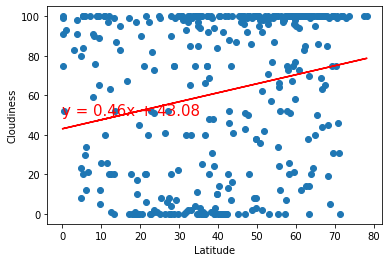

In [142]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.show()

The r-squared is: 0.036131824927780505
y = 0.54x + 70.47


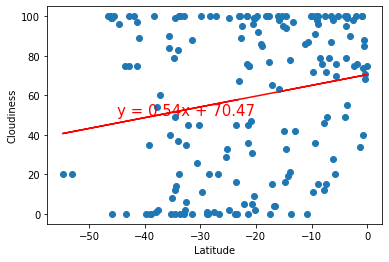

In [143]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.show()

**Discussion about the linear relationship:** If we compare latitude with cloudiness in northen hempisphere, r squared is 0.04 from which we can say very small increase in cloudiness with increase in latitude, there are other factors that the cloudiness.Also,coefficent is positive which means cloudiness will incraese with latitude. In southern hemisphere, it is 0.03, which is very weak , so we can say it cloudiness does not get affected with latitude in southern hemisphere and positive coefficent shows increase in cloudiness with increase in latitude value.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.03768408140930688
y = 0.03x + 2.47


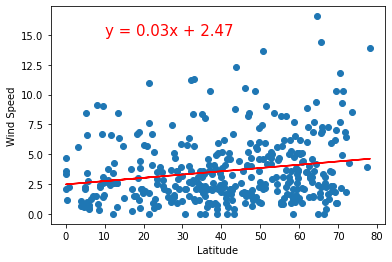

In [144]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.show()

The r-squared is: 0.08583170095315888


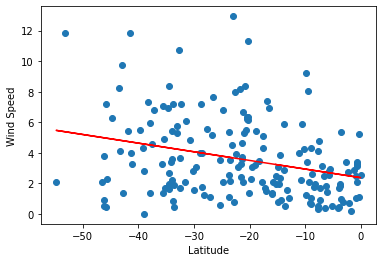

In [145]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In northern hemisphere, r squared value is 0.037 which means very small increase in wind speed with latitude increase and also in equation of line coefficient sign is positive which tells us incraese in wind speed with increase in latitude. On the other hand in southern hemisphere, r squared is 0.0858 and coefficent sign is negative which shows a vey slight decrease in wind speed with latitude.